### View and compare time series


In [ ]:
# Import packages
import numpy as np
import pandas as pd
import yfinance as yf
import statsmodels.api as sm
import scipy.optimize as spop
import matplotlib.pyplot as plt

print("Yahoo Finance: ", yf.__version__)
# EM: IEMG(0.09), SPEM(0.07), VWO(0.08), EEM(0.72)
# Env/Carbon/ESG: LCTD(0.20), ICLN(0.41), ERTH(0.67)
# Quantum/AI/Tech: QTUM(0.40), BLOK(0.76), FTEC(0.08), VGT(0.09), IXN(0.41)
# IXN more global than FTEC, includes Europe, China, Japan and Australia
# SPEM doesn't have Russia, but IEMG has Russia => choose SPEM

Yahoo Finance:  0.2.55


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
C:\Users\sebgu\AppData\Local\Temp\ipykernel_17368\1707848085.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  start = data[stock][0]


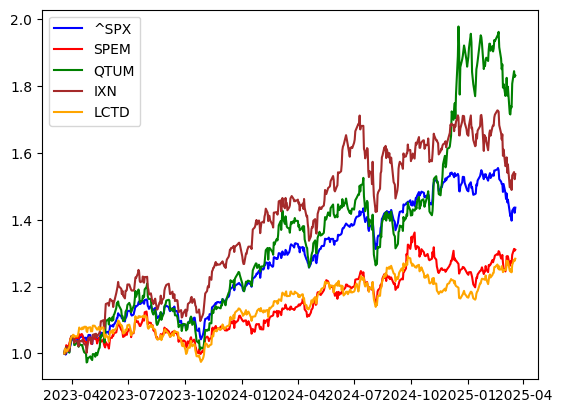

In [46]:
stocks = ['^SPX', 'SPEM', 'QTUM', 'IXN', 'LCTD', 'BLOK'] # Watchlist
# stocks = ['IEMG', 'SPEM', 'VWO', 'EEM'] # EM
# stocks = ['ERTH', 'LCTD', 'QCLN', 'ICLN'] # Env/Carbon/ESG
# stocks = ['QTUM', 'BLOK', 'FTEC', 'IXN'] # Quantum/AI/Tech
colors = ['blue', 'red', 'green', 'brown', 'orange']
start = '2023-03-20'
end = '2025-03-20'

# Retrieving data
data = pd.DataFrame()
for stock in stocks:
    prices = yf.download(stock, start, end)
    data[stock] = prices['Close']

# Scale to 1 at start
scaled = data.copy()
for stock in stocks:
    start = data[stock][0]
    scaled[stock] = scaled[stock] / start

dates = scaled.index

# Plot
for stock, color in zip(stocks, colors):
    plt.plot(dates, scaled[stock], label=stock, color=color)
plt.legend(loc='upper left')

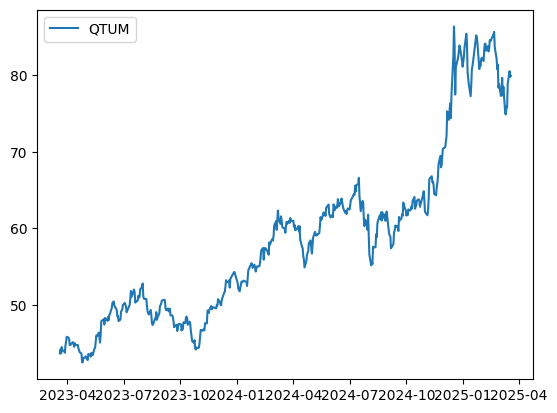

In [50]:
# Absolute value
absStock = 'QTUM'
plt.plot(dates, data[absStock], label=absStock)
plt.legend(loc='upper left')